### Reading and Pre-processing Data

In [72]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

In [73]:
amazon_data = pd.read_csv('amazon_Reviews.csv')
amazon_data.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,review_rating
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,POSITIVE


In [74]:
amazon_data.count()

id                      4687
name                    4329
asins                   4687
brand                   4687
categories              4687
keys                    4687
manufacturer            4687
reviews.date            4677
reviews.dateAdded       3973
reviews.dateSeen        4687
reviews.didPurchase        0
reviews.doRecommend     4551
reviews.id                 0
reviews.numHelpful      4581
reviews.rating          4654
reviews.sourceURLs      4687
reviews.text            4687
reviews.title           4687
reviews.userCity           0
reviews.userProvince       0
reviews.username        4687
review_rating           4687
dtype: int64

In [75]:
X = amazon_data["reviews.text"].values.astype("U")
y = amazon_data["review_rating"]
print(X.shape, y.shape)

(4687,) (4687,)


In [76]:
X[0],y[0]

('This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'POSITIVE')

In [77]:
print(amazon_data["reviews.rating"].value_counts())

5.0    1645
3.0    1499
4.0     698
1.0     410
2.0     402
Name: reviews.rating, dtype: int64


In [78]:
print(amazon_data["review_rating"].value_counts())

NEGATIVE    2344
POSITIVE    2343
Name: review_rating, dtype: int64


In [79]:
amazon_data[["reviews.rating","review_rating"]].head()

,reviews.rating,review_rating
0,5.0,POSITIVE
1,5.0,POSITIVE
2,5.0,POSITIVE
3,4.0,POSITIVE
4,5.0,POSITIVE


In [80]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data


In [84]:
# cv.get_feature_names()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [69]:
# #amazon df
# vectorizer= TfidfVectorizer()
# X1_train_vectors=vectorizer.fit_transform(X1_train)
# # X1_test_vectors = vectorizer.transform(X1_test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
# Function to calculate accuracy , confusion matrix, classification report
def cal_accuracy(y_test, y_pred): 
      
    print("""\nConfusion Matrix: \n""", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("\nAccuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\nClassification Report : \n", 
    classification_report(y_test, y_pred)) 
  

In [12]:
# Function to calculate accuracy score
def model_accuracy(y_test, y_pred): 
        return accuracy_score(y_test,y_pred)*100 
    

### Naive Bayes Classifier

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
# Naive Bayes Model
clf = MultinomialNB()
# Model Fit
clf.fit(X_train,y_train)
# Model Score
clf.score(X_test,y_test)
# Model Prediction
y_pred = clf.predict(X_test)
# Model Accuracy
cal_accuracy(y_test, y_pred)
NB_accuracy = model_accuracy(y_test, y_pred)


Confusion Matrix: 
 [[593 174]
 [101 679]]

Accuracy : 
 82.22365869424692

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.85      0.77      0.81       767
    POSITIVE       0.80      0.87      0.83       780

   micro avg       0.82      0.82      0.82      1547
   macro avg       0.83      0.82      0.82      1547
weighted avg       0.82      0.82      0.82      1547



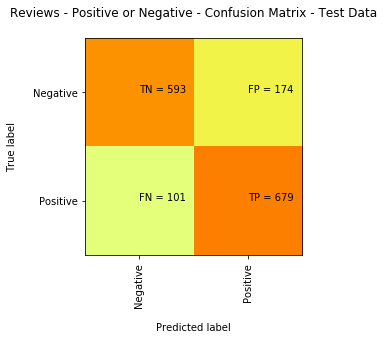

In [15]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Decision Tree

In [16]:
from sklearn import tree

In [17]:
# Decision Tree Model
tree_clf = tree.DecisionTreeClassifier()
# Model Fit
tree_clf = tree_clf.fit(X_train,y_train)
# Model score
tree_clf.score(X_test, y_test)
# Model Predict
y_tree_predicted = tree_clf.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_tree_predicted)
DT_accuracy = model_accuracy(y_test, y_tree_predicted)


Confusion Matrix: 
 [[532 235]
 [209 571]]

Accuracy : 
 71.29928894634777

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.72      0.69      0.71       767
    POSITIVE       0.71      0.73      0.72       780

   micro avg       0.71      0.71      0.71      1547
   macro avg       0.71      0.71      0.71      1547
weighted avg       0.71      0.71      0.71      1547



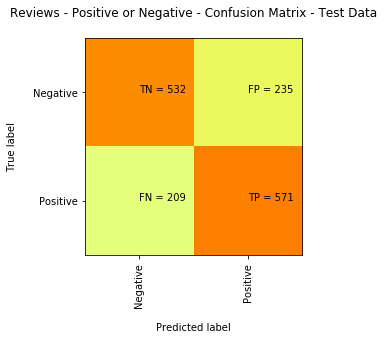

In [18]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_tree_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

###  Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=200)
# Model Fit
rf = rf.fit(X_train, y_train)
# Model Score
rf.score(X_test, y_test)
# Model Predict
y_rf_predicted = rf.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_rf_predicted)
RF_accuracy = model_accuracy(y_test, y_rf_predicted)


Confusion Matrix: 
 [[632 135]
 [161 619]]

Accuracy : 
 80.86619263089851

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.80      0.82      0.81       767
    POSITIVE       0.82      0.79      0.81       780

   micro avg       0.81      0.81      0.81      1547
   macro avg       0.81      0.81      0.81      1547
weighted avg       0.81      0.81      0.81      1547



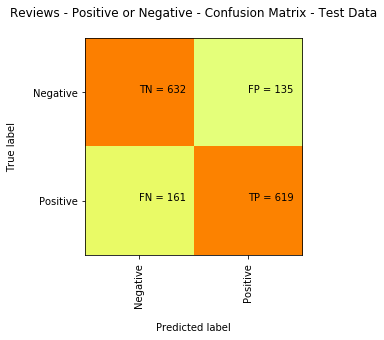

In [21]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_rf_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.632
k: 3, Train/Test Score: 0.818/0.639
k: 5, Train/Test Score: 0.794/0.678
k: 7, Train/Test Score: 0.762/0.672
k: 9, Train/Test Score: 0.743/0.672
k: 11, Train/Test Score: 0.737/0.685
k: 13, Train/Test Score: 0.730/0.686
k: 15, Train/Test Score: 0.725/0.685
k: 17, Train/Test Score: 0.718/0.689
k: 19, Train/Test Score: 0.718/0.689
k: 21, Train/Test Score: 0.714/0.690
k: 23, Train/Test Score: 0.709/0.690
k: 25, Train/Test Score: 0.706/0.693
k: 27, Train/Test Score: 0.698/0.694
k: 29, Train/Test Score: 0.699/0.701
k: 31, Train/Test Score: 0.696/0.693
k: 33, Train/Test Score: 0.694/0.700
k: 35, Train/Test Score: 0.696/0.696
k: 37, Train/Test Score: 0.693/0.694
k: 39, Train/Test Score: 0.693/0.693


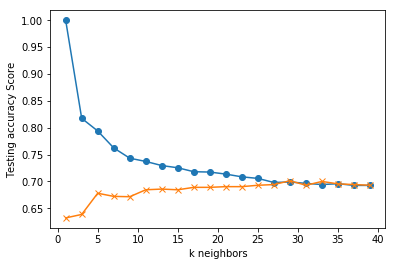

In [23]:
# KNN Model
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    # Knn Model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Model Fit
    knn.fit(X_train, y_train)
    # Model score
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Note that k: 29 provides the best accuracy where the classifier starts to stablize
# Model
knn = KNeighborsClassifier(n_neighbors=29)
# Model Fit
knn.fit(X_train, y_train)
print("K= 29")
# Model Predict
y_knn_predicted = knn.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_knn_predicted)
KNN_accuracy = model_accuracy(y_test, y_knn_predicted)

K= 29

Confusion Matrix: 
 [[364 403]
 [ 59 721]]

Accuracy : 
 70.13574660633483

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.86      0.47      0.61       767
    POSITIVE       0.64      0.92      0.76       780

   micro avg       0.70      0.70      0.70      1547
   macro avg       0.75      0.70      0.68      1547
weighted avg       0.75      0.70      0.69      1547



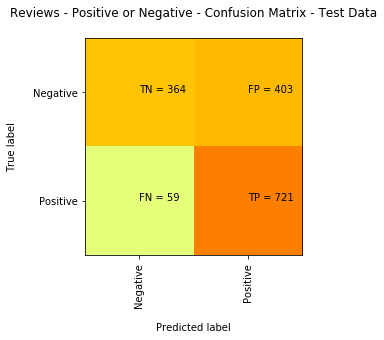

In [25]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_knn_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Logistics Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Logistic Regression Model
lr = LogisticRegression(random_state= 42)
# Model Fit
lr = lr.fit(X_train, y_train)
# Model Score
lr.score(X_test, y_test)
# Model Predict
y_lr_predicted = lr.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_lr_predicted)
LR_accuracy = model_accuracy(y_test, y_lr_predicted)

C:\Users\miva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Confusion Matrix: 
 [[607 160]
 [144 636]]

Accuracy : 
 80.34906270200388

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.81      0.79      0.80       767
    POSITIVE       0.80      0.82      0.81       780

   micro avg       0.80      0.80      0.80      1547
   macro avg       0.80      0.80      0.80      1547
weighted avg       0.80      0.80      0.80      1547



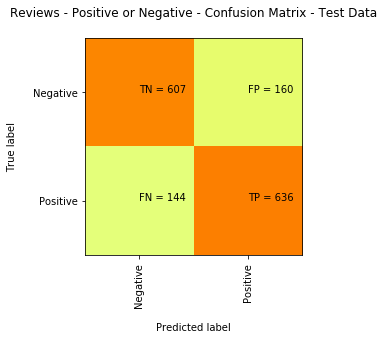

In [28]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_lr_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Plot

[82.22365869424692, 71.29928894634777, 80.86619263089851, 70.13574660633483, 80.34906270200388]


([<matplotlib.axis.XTick at 0x1d62839f080>,
 <a list of 5 Text xticklabel objects>)

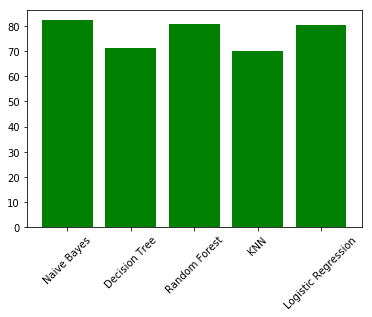

In [49]:
# Plotting the accuracy of models
accuracy_score_list = []
accuracy_score_list.append(NB_accuracy)
accuracy_score_list.append(DT_accuracy)
accuracy_score_list.append(RF_accuracy)
accuracy_score_list.append(KNN_accuracy)
accuracy_score_list.append(LR_accuracy)
y_axis = accuracy_score_list
print(accuracy_score_list)
models_list = ["Naive Bayes","Decision Tree","Random Forest","KNN","Logistic Regression"]
x_axis = [1,2,3,4,5]
plt.bar(x_axis, y_axis,color= "green")
plt.xticks(x_axis,models_list,rotation=45)

### Wordcloud

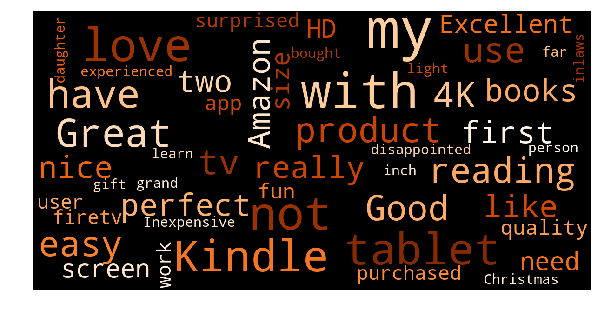

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 50,
        max_font_size = 40,
        colormap="Oranges_r",
        stopwords=["charger", "nothing","well","beginner","cover","but","and","remote","to","so","other","she","gave","go","Fire","Got","weeks","had","up","I've","does","is","on","from","the","was","in","or","th","it","thi","this","about","him","did","now","after","when","that","as","for","any","lot","has","than","Boug","of"],
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(amazon_data["reviews.text"])

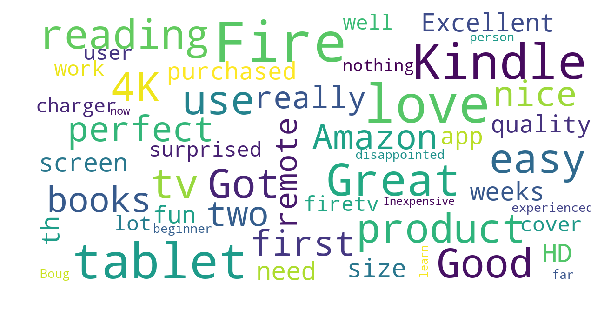

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(amazon_data["reviews.text"])